# This notebook illustrates the Gaussian Process Regression

In [2]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

from InfoGrad import InfoGrad
from IPython.display import HTML

import pickle as pkl

%load_ext autoreload
%autoreload 2

In [3]:
# The underlying function
def f(x):
    return -1+0.01*(x-4.9)*(x+5)*(x+0.5)*(x-3.5)


In [20]:
def animate_hist(mode,mu_hist,std_hist,X,noisy_Y,n_0,n_robot):
    
    
    full_X = np.linspace(-5,5,100)
    plt.rc('font',size=14)
    fig = plt.figure(dpi=200)
    
    N_frames = len(mu_hist)+5

    def update(i):
        fig.clf()
        
        mu = mu_hist[np.min([i,len(mu_hist)-1])]
        std = std_hist[np.min([i,len(mu_hist)-1])]
        
        plt.title(mode)
        if i >= len(mu_hist):
            plt.plot(full_X,f(full_X),label=r'$f(x)$',lw=3,color='b')
            
        plt.scatter(X[:n_robot*i+n_0],noisy_Y[:n_robot*i+n_0],marker='+',label=r'y',s=200,color='b')
        
        
        if i >0 and i <len(mu_hist):
            plt.scatter(X[n_robot*(i-1)+n_0:n_robot*i+n_0],np.zeros(n_robot),label='Robot locs',marker = 'd',s=100)

        plt.plot(full_X,mu,label=r'$\hat{f}(x)$',lw=3,ls='dotted',color='b')
        plt.fill_between(full_X,mu+std,mu-std,alpha=0.3)

        # plt.axhline(0,lw = 3,ls="-.",label='Sea level')
        plt.axhline(0,lw = 1,ls="-.")
        plt.ylim(-4,1)
        plt.legend(loc='upper left')
        plt.tight_layout()

#         ax2 = plt.gca().twinx()
#         ax2.plot(full_X,std,label='Uncertainty',color='black',ls='dashed')
#         ax2.set_ylim(0,1)

#         ax2.legend()


    ani = FuncAnimation(fig, update, frames=range(N_frames),interval = 500)
#     return HTML(ani.to_html5_video())
    return ani

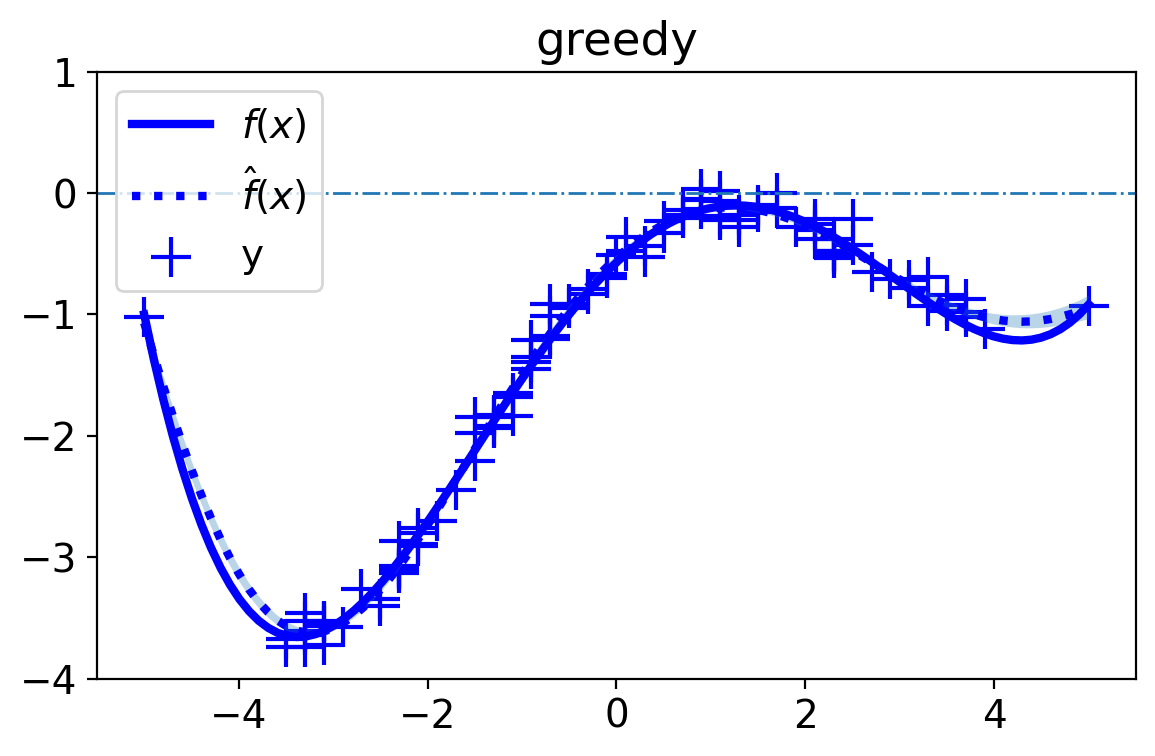

In [21]:
mode = 'greedy'
with open('{}.pkl'.format(mode),'rb') as file:
    data = pkl.load(file)

ani = animate_hist(mode,**data)
ani.save("{}1D.mp4".format(mode))

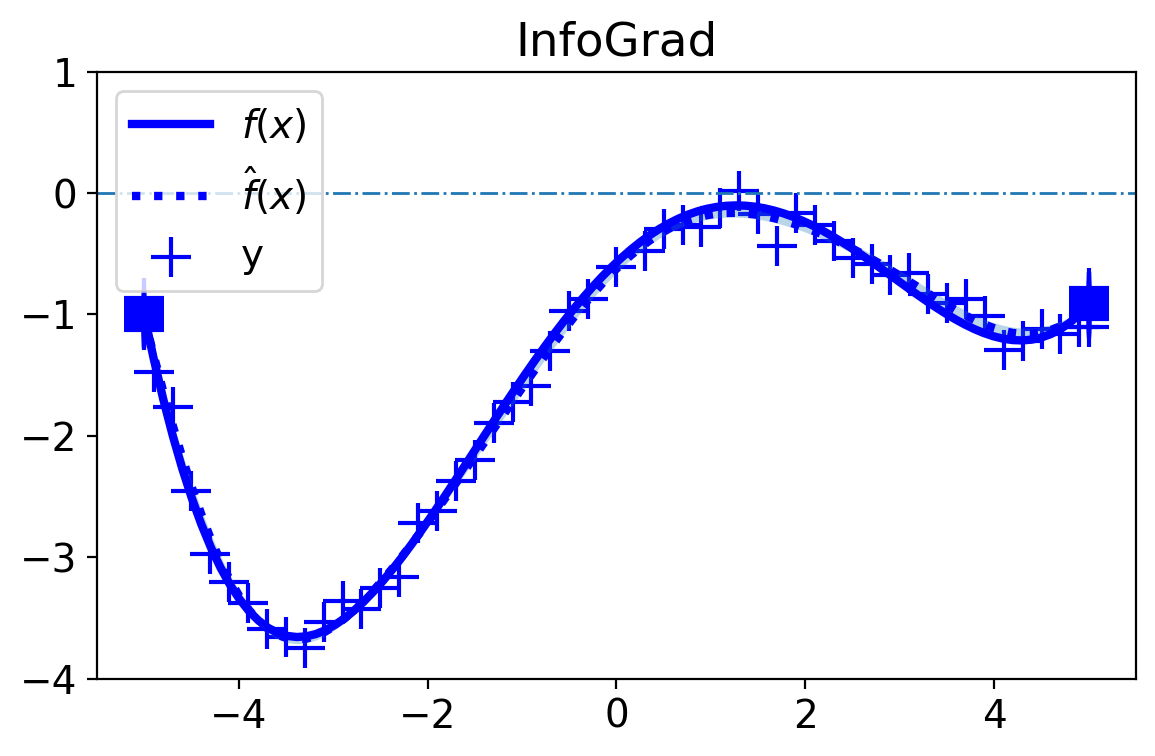

In [22]:
mode = 'InfoGrad'
with open('{}.pkl'.format(mode),'rb') as file:
    data = pkl.load(file)


ani = animate_hist(mode,**data)
ani.save("{}1D.mp4".format(mode))

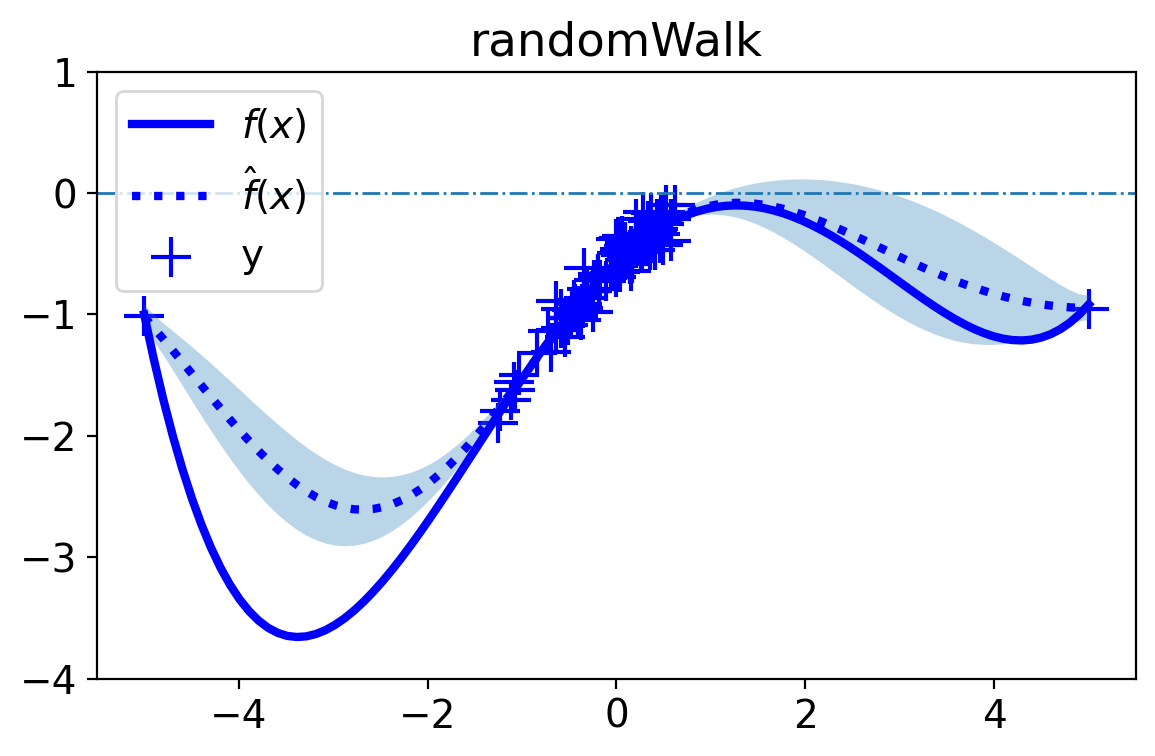

In [23]:
mode = 'randomWalk'
with open('{}.pkl'.format(mode),'rb') as file:
    data = pkl.load(file)

ani = animate_hist(mode,**data)
ani.save("{}1D.mp4".format(mode))

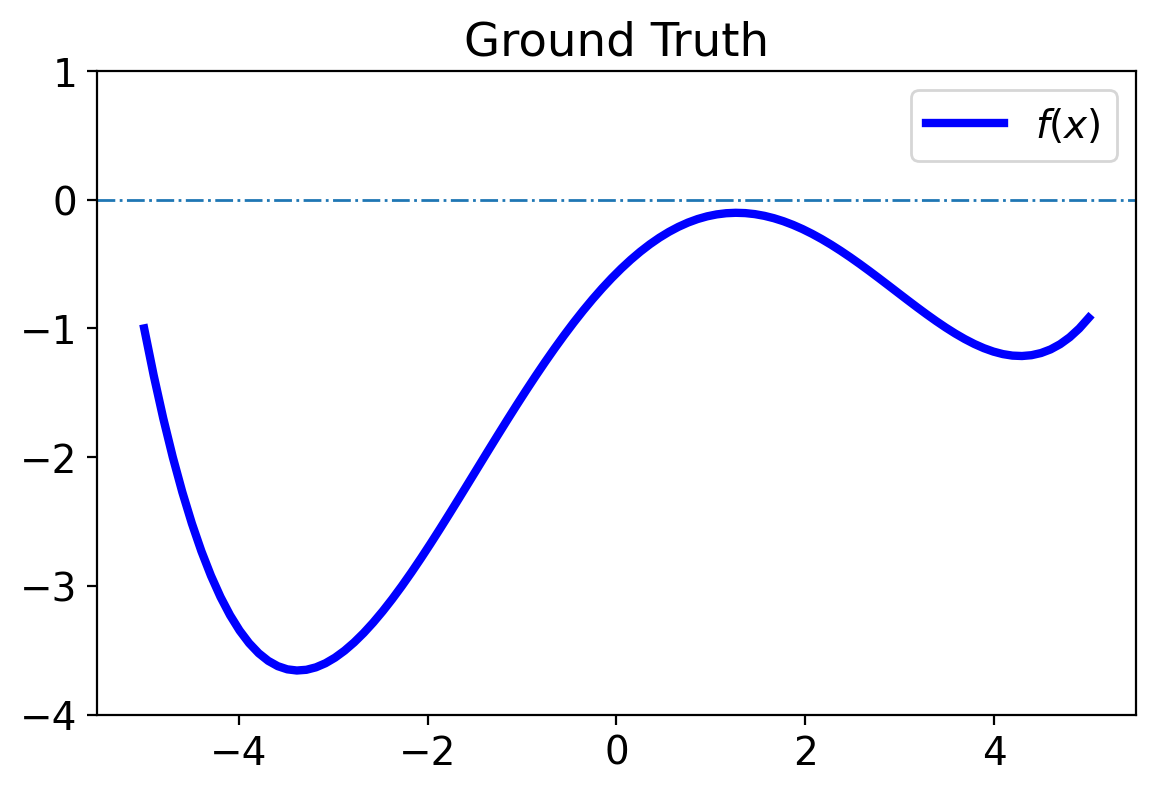

In [27]:
full_X = np.linspace(-5,5,100)
plt.rc('font',size=14)
fig = plt.figure(dpi=200)

plt.plot(full_X,f(full_X),label=r'$f(x)$',lw=3,color='b')


# plt.axhline(0,lw = 3,ls="-.",label='Sea level')
plt.axhline(0,lw = 1,ls="-.")
plt.ylim(-4,1)
plt.legend(loc='upper left')
plt.tight_layout()
plt.title("Ground Truth")
plt.legend()
plt.savefig('GrundTruth1D.png')